# Multilinear Regression
## Multiple inputs + 1 output
### Problem statement: Create a predictive model for prediction of mielage per gallon on the basis of different input factors

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mtcars.csv')
df[:4]

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1


In [4]:
df.isna().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [7]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

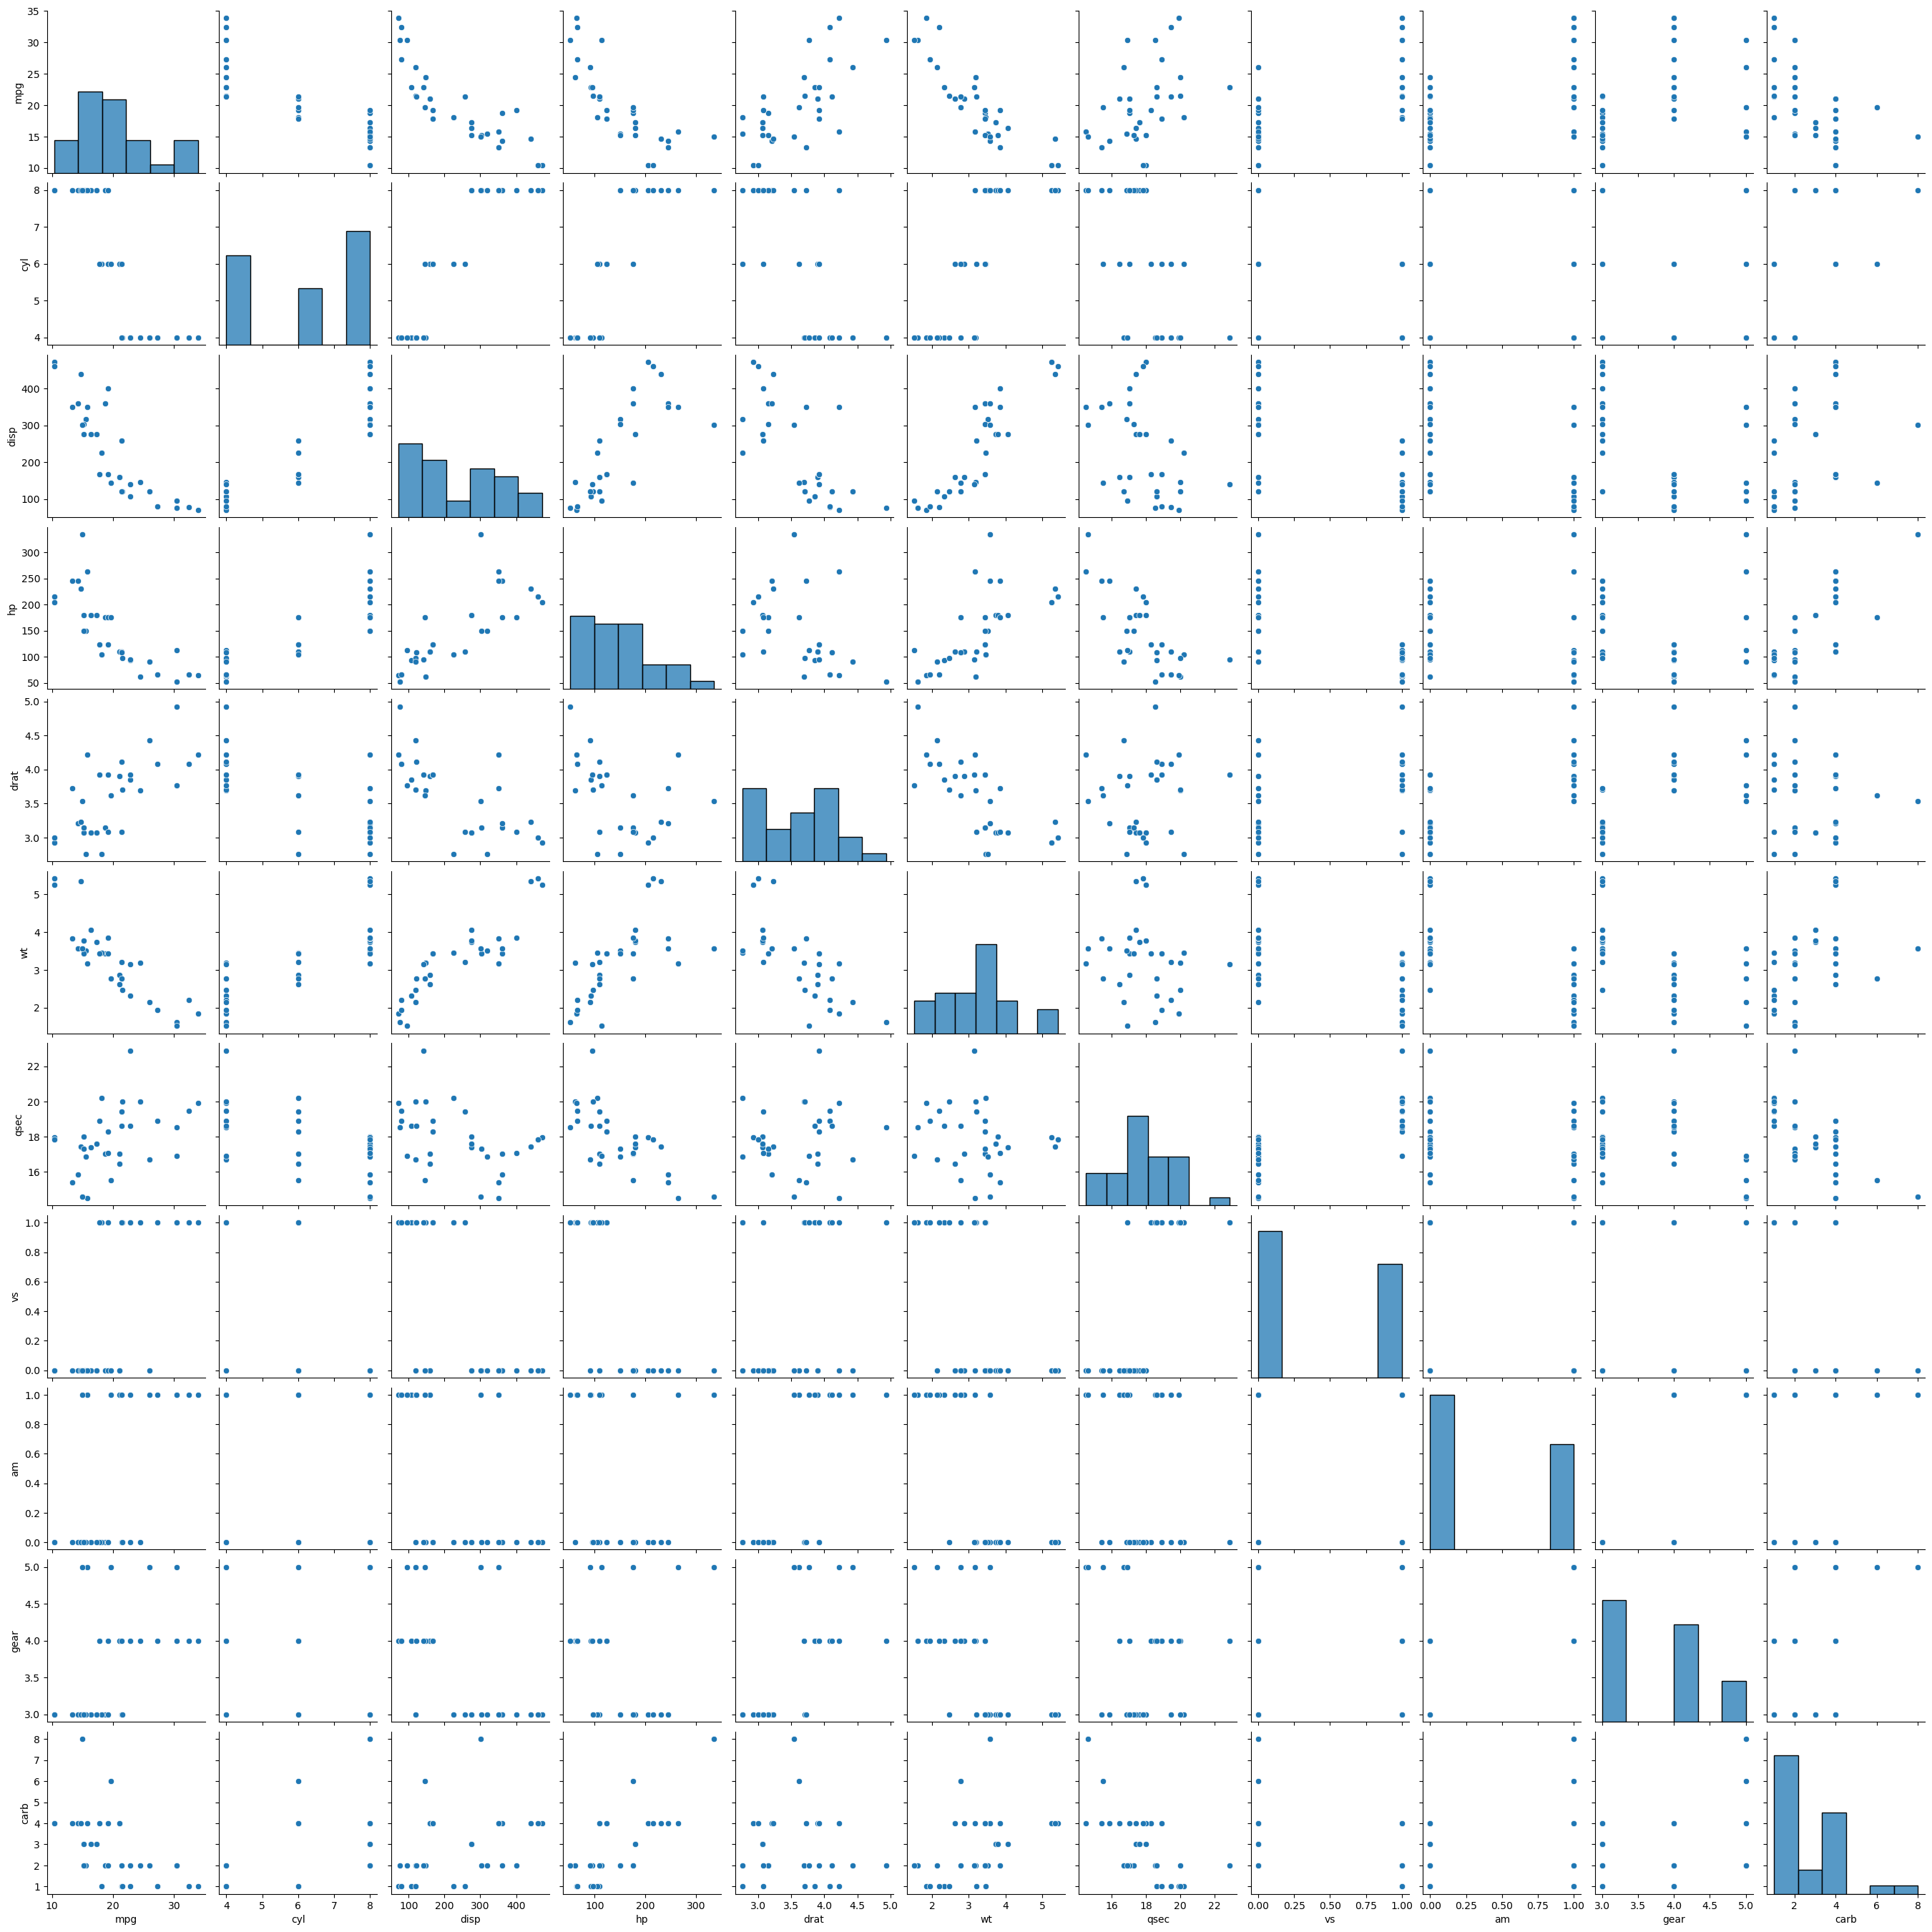

In [8]:
sns.pairplot(df)

In [13]:
corr = df.corr()
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


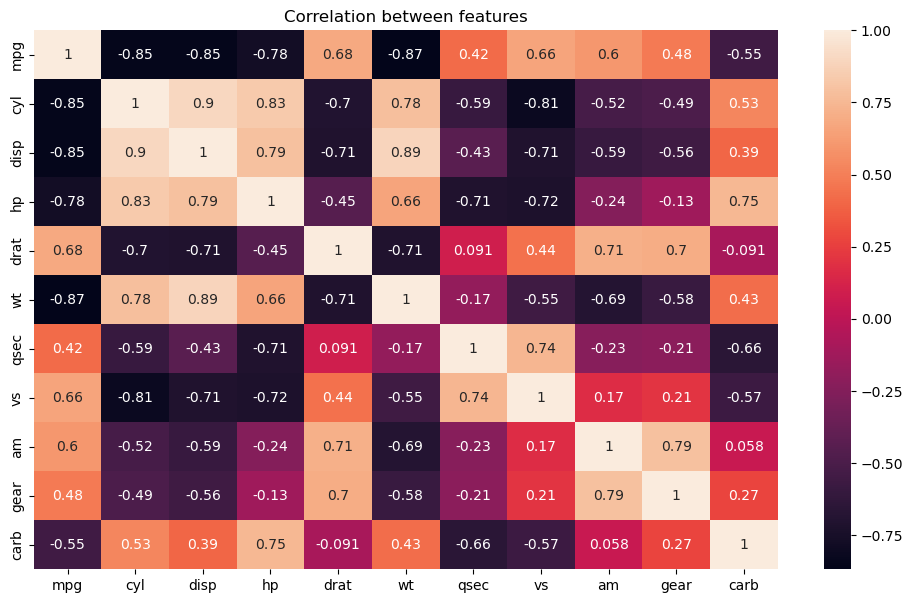

In [15]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr,annot=True)
plt.title('Correlation between features')
plt.show()

In [16]:
#select data
x = df.loc[:,['disp','hp','wt']]
x[:2]

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875


In [17]:
y = df.mpg
y[:3]

0    21.0
1    21.0
2    22.8
Name: mpg, dtype: float64

## Training

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model  = LinearRegression()
model

LinearRegression()

In [20]:
model.fit(x,y)

LinearRegression()

## Testing

In [21]:
model.predict([[140.0,100,2.5]])

array([24.35644246])

In [22]:
x[:1]

,disp,hp,wt
0,160.0,110,2.62


## Splitting of the data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [59]:
x_train[:5]

,disp,hp,wt
6,360.0,245,3.570
2,108.0,93,2.320
26,120.3,91,2.140
25,79.0,66,1.935
18,75.7,52,1.615


In [27]:
x_test[:2]

,disp,hp,wt
4,360.0,175,3.440
24,400.0,175,3.845


In [28]:
train_test_split(x,y,train_size=.8)

[     disp   hp     wt
 30  301.0  335  3.570
 19   71.1   65  1.835
 8   140.8   95  3.150
 0   160.0  110  2.620
 13  275.8  180  3.780
 16  440.0  230  5.345
 29  145.0  175  2.770
 1   160.0  110  2.875
 3   258.0  110  3.215
 9   167.6  123  3.440
 20  120.1   97  2.465
 5   225.0  105  3.460
 12  275.8  180  3.730
 24  400.0  175  3.845
 4   360.0  175  3.440
 21  318.0  150  3.520
 25   79.0   66  1.935
 6   360.0  245  3.570
 22  304.0  150  3.435
 14  472.0  205  5.250
 28  351.0  264  3.170
 26  120.3   91  2.140
 11  275.8  180  4.070
 23  350.0  245  3.840
 7   146.7   62  3.190,
      disp   hp     wt
 15  460.0  215  5.424
 31  121.0  109  2.780
 17   78.7   66  2.200
 18   75.7   52  1.615
 10  167.6  123  3.440
 27   95.1  113  1.513
 2   108.0   93  2.320,
 30    15.0
 19    33.9
 8     22.8
 0     21.0
 13    15.2
 16    14.7
 29    19.7
 1     21.0
 3     21.4
 9     19.2
 20    21.5
 5     18.1
 12    17.3
 24    19.2
 4     18.7
 21    15.5
 25    27.3
 6     14.3


In [29]:
#Training
model.fit(x_train,y_train)

LinearRegression()

In [30]:
dm = model.predict(x_test)
dm

array([17.70591342, 16.07118516, 17.03392416, 20.97516818, 23.42789723,
       18.42789189, 10.04765219])

In [31]:
new = [[100.0,150,3.5]]
new

[[100.0, 150, 3.5]]

In [32]:
n=model.predict(new)
n

array([20.04620445])

In [33]:
model.score(x_train,y_train)*100

82.35487385487087

In [60]:
model.score(x_test,y_test)*100

71.25395482036329

In [34]:
m1,m2,m3 = model.coef_

In [35]:
m1,m2,m3

(-0.007117636510373481, -0.02758835638069089, -3.333389641933283)

In [36]:
x1 = 50.4
x2 = 40
x3 = 1.6

In [37]:
c = model.intercept_
c

36.56308530054103

In [38]:
m1*x1+m2*2+m3*x3+c

30.815756280563576

In [39]:
model.score(x_train,y_train)*100

82.35487385487087

In [40]:
model.score(x_test,y_test)*100

71.25395482036329